<a href="https://colab.research.google.com/github/ch2kings/AirKING/blob/master/notebooks/LIN_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-979995a97852>:15: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


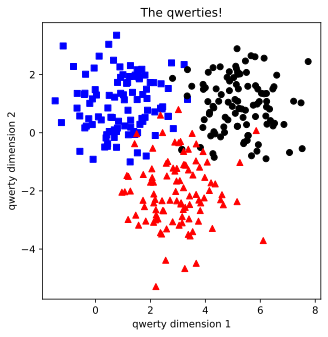

torch.Size([300, 2])
torch.Size([300, 3])
Final accuracy: 93.6667%


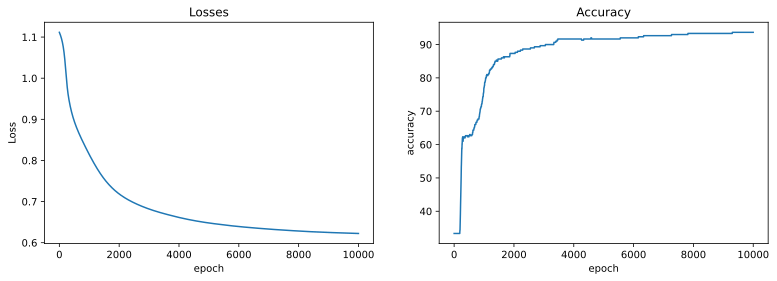

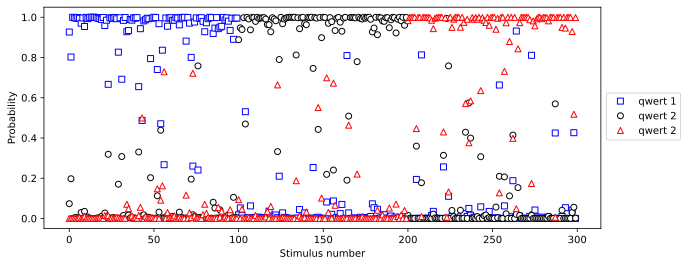

In [ ]:

# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: CodeChallenge: more qwerties!
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202305


# import libraries
import numpy as np
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')


# Import and process the data


# create data

nPerClust = 100
blur = 1

A = [  1,  1 ]
B = [  5,  1 ]
C = [  3, -2 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1)),1+np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b,c)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.squeeze(torch.tensor(labels_np).long())

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'r^')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()


# %% [markdown]
# Create the ANN model


# %% [code]
# model architecture
ANNq = nn.Sequential(
    nn.Linear(2,4),    # input layer
    nn.ReLU(),         # activation unit
    nn.Linear(4,3),    # output units
    nn.Softmax(dim=1), # final activation unit (see Additional Exploration #2 for a discussion about this)
      )

# loss function
lossfun = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(ANNq.parameters(),lr=.01)


# %% [code]
# test the model
yHat = ANNq(data)

print(data.shape)
print(yHat.shape)


# %% [markdown]
# Train the model


# %% [code]
numepochs = 10000

# initialize losses
losses = torch.zeros(numepochs)
ongoingAcc = []

# loop over epochs
for epochi in range(numepochs):

  # forward pass
  yHat = ANNq(data)

  # compute loss
  loss = lossfun(yHat,labels)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # compute accuracy
  matches = torch.argmax(yHat,axis=1) == labels # booleans (false/true)
  matchesNumeric = matches.float()              # convert to numbers (0/1)
  accuracyPct = 100*torch.mean(matchesNumeric)  # average and x100
  ongoingAcc.append( accuracyPct )              # add to list of accuracies



# final forward pass
predictions = ANNq(data)

predlabels = torch.argmax(predictions,axis=1)
totalacc = 100*torch.mean((predlabels == labels).float())


# Visualize the results


# report accuracy
print('Final accuracy: %g%%' %totalacc)

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()


# confirm that all model predictions sum to 1
torch.sum(yHat,axis=1)


# plot the raw model outputs

fig = plt.figure(figsize=(10,4))

colorshape = [  'bs','ko','r^' ]
for i in range(3):
  plt.plot(yHat[:,i].detach(),colorshape[i],markerfacecolor='w')

plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['qwert 1','qwert 2','qwert 2'],loc=(1.01,.4))
plt.show()





# Additional explorations


# 1) Does the model always do well? Re-run the entire notebook multiple times and see if it always reaches high accuracy
#    (e.g., >90%). What do you think would be ways to improve the performance stability of the model?
#
# 2) You'll learn in the section "Metaparameters" that CrossEntropyLoss computes log-softmax internally. Does that mean
#    that the Softmax() layer in the model needs to be there? Does it hurt or help? If you remove that final layer, what
#    would change and what would be the same in the rest of the notebook?
#    (Note about this problem: If it feels too advanced, then revisit this problem after the "Metaparameters" section.)
#




# New Section

# New Section

In [4]:
import numpy as np
#%matplotlib widget
import matplotlib.pyplot as plt


In [5]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1)

In [10]:
dlc = dict(dlblue = '#0096ff', dlorange = '#FF9300', dldarkred='#C00000', dlmagenta='#FF40FF', dlpurple='#7030A0')
dlblue = '#0096ff'; dlorange = '#FF9300'; dldarkred='#C00000'; dlmagenta='#FF40FF'; dlpurple='#7030A0'
dlcolors = [dlblue, dlorange, dldarkred, dlmagenta, dlpurple]



def plot_data(X, y, ax, pos_label="y=1", neg_label="y=0", s=80, loc='best' ):
    """ plots logistic data with two axis """
    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0
    pos = pos.reshape(-1,)  #work with 1D or 1D y vectors
    neg = neg.reshape(-1,)

    # Plot examples
    ax.scatter(X[pos, 0], X[pos, 1], marker='x', s=s, c = 'red', label=pos_label)
    ax.scatter(X[neg, 0], X[neg, 1], marker='o', s=s, label=neg_label, facecolors='none', edgecolors=dlblue, lw=3)
    ax.legend(loc=loc)

    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.header_visible = False
    ax.figure.canvas.footer_visible = False

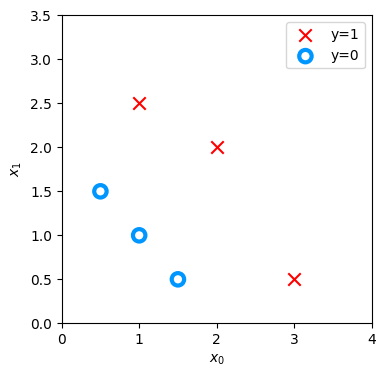

In [11]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(X, y, ax)

ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$')
ax.set_xlabel('$x_0$')
plt.show()

In [12]:

import numpy as np

X = np.random.rand(10000,5)
m = np.random.randint(low = 1, high = 20,size = (5,1))  #parametri random tra low e high
q = np.random.rand(1)
y = (X @ m) + q

noise = np.random.randn(y.shape[0], y.shape[1])
y = y + noise

X.shape, m.shape, q.shape, y.shape

((10000, 5), (5, 1), (1,), (10000, 1))

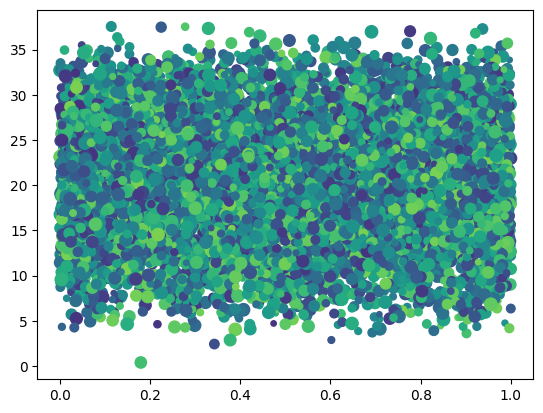

In [47]:
fig, ax = plt.subplots()
sizes = np.random.uniform(15, 80, len(X))
colors = np.random.uniform(15, 80, len(X))
ax.scatter(np.random.rand(len(y)), y, s=sizes, c=colors, vmin=0, vmax=100)

In [13]:
X = np.concatenate([X , np.ones((X.shape[0],1))], axis = 1)
m = np.concatenate([m,q.reshape(1,-1)],axis = 0)

In [14]:
m


array([[ 6.        ],
       [12.        ],
       [17.        ],
       [ 2.        ],
       [ 2.        ],
       [ 0.68918907]])

In [19]:
y


array([[11.98114029],
       [10.57474381],
       [12.70340059],
       ...,
       [14.87096179],
       [23.68626707],
       [10.28520974]])

In [20]:
y.shape

(10000, 1)

In [21]:
def mean_squared_error(X,y,m_stat):
  y_pred = X @ m_stat
  mse = np.sum(((y_pred - y)**2),axis = 0) / len(X)

  return mse

In [24]:
def partial_derivative(X_batch, y_batch, m_stat):

  y_pred = X_batch @ m_stat
  n = len(X_batch)

  df_dm =  (-2/n) * (X_batch.T @ (y_batch - y_pred))
  df_dm = df_dm.reshape(len(df_dm),-1)

  return df_dm

In [22]:
def training(X, y, batch_size, lr, epochs):

  for epoch in range(epochs):

    #random initial statistics
    if epoch == 0:
      m_stat = np.random.rand(X.shape[1],1)

    #shuffle X and y using same permutation
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    X = X[indices]
    y = y[indices]

    #store comulative derivative
    cumulative_derivative = np.zeros((X.shape[1],1))

    for batch in range(len(X)//batch_size):
      start = batch*batch_size
      stop = (batch*batch_size) + batch_size

      X_batch = X[start:stop]
      y_batch = y[start:stop]

      #derivative
      cumulative_derivative = cumulative_derivative + partial_derivative(X_batch, y_batch, m_stat)

      #updating rule
      m_stat = m_stat - (lr*cumulative_derivative)

    print(f"epoch: {epoch} ----> MSE: {mean_squared_error(X,y,m_stat)}")

  return m_stat

In [25]:
batch_size = 1024
lr = 0.01
epochs = 500

m_stat = training(X,y, batch_size,lr,epochs)

epoch: 0 ----> MSE: [96.11181376]
epoch: 1 ----> MSE: [31.40201743]
epoch: 2 ----> MSE: [16.47823221]
epoch: 3 ----> MSE: [12.16184147]
epoch: 4 ----> MSE: [10.34580795]
epoch: 5 ----> MSE: [9.13089209]
epoch: 6 ----> MSE: [8.14873358]
epoch: 7 ----> MSE: [7.29960516]
epoch: 8 ----> MSE: [6.5787859]
epoch: 9 ----> MSE: [5.93757514]
epoch: 10 ----> MSE: [5.38410987]
epoch: 11 ----> MSE: [4.90764094]
epoch: 12 ----> MSE: [4.48111615]
epoch: 13 ----> MSE: [4.11333037]
epoch: 14 ----> MSE: [3.78920234]
epoch: 15 ----> MSE: [3.49693173]
epoch: 16 ----> MSE: [3.24143]
epoch: 17 ----> MSE: [3.01063829]
epoch: 18 ----> MSE: [2.80937049]
epoch: 19 ----> MSE: [2.63086426]
epoch: 20 ----> MSE: [2.47456007]
epoch: 21 ----> MSE: [2.33636242]
epoch: 22 ----> MSE: [2.21215855]
epoch: 23 ----> MSE: [2.1029536]
epoch: 24 ----> MSE: [2.00445831]
epoch: 25 ----> MSE: [1.91498731]
epoch: 26 ----> MSE: [1.83687019]
epoch: 27 ----> MSE: [1.7643652]
epoch: 28 ----> MSE: [1.69861591]
epoch: 29 ----> MSE: [1.6

In [26]:
print(m_stat,"\n")
print(m)

X_test = np.random.rand(500,5)
X_test = np.concatenate([X_test,np.ones(shape = (500,1))] , axis = 1)
y_test = X_test @ m

y_preds = X_test @ m_stat
mse = mean_squared_error(X_test, y_test, m_stat)

print("mse" , mse)

print(y_test[:5])
print(y_preds[:5])

[[ 5.95971901]
 [12.01025493]
 [17.00241817]
 [ 1.99438856]
 [ 1.94219202]
 [ 0.72994378]] 

[[ 6.        ]
 [12.        ]
 [17.        ]
 [ 2.        ]
 [ 2.        ]
 [ 0.68918907]]
mse [0.0004462]
[[13.17813122]
 [13.79563374]
 [22.72631024]
 [19.35225107]
 [24.84627787]]
[[13.17738692]
 [13.78155084]
 [22.7031686 ]
 [19.38881085]
 [24.8548722 ]]


In [28]:
X_test.shape

(500, 6)

In [29]:
X_test[:5]

array([[0.06654035, 0.04930778, 0.50485645, 0.83765844, 0.62006505,
        1.        ],
       [0.66980263, 0.07820332, 0.35475293, 0.60756484, 0.45162981,
        1.        ],
       [0.47984306, 0.22704942, 0.83133079, 0.33713291, 0.81329025,
        1.        ],
       [0.06231179, 0.27782519, 0.7686422 , 0.9232171 , 0.02096871,
        1.        ],
       [0.75075003, 0.43767744, 0.75092344, 0.7477023 , 0.06967813,
        1.        ]])

In [30]:
m

array([[ 6.        ],
       [12.        ],
       [17.        ],
       [ 2.        ],
       [ 2.        ],
       [ 0.68918907]])